In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

* O objetivo deste notebook é por em prática a análise e previsão de dados vistas no livro de series temporais, implementando o que foi visto nos capitulos abordados no livro.   
A seguir veremos a visualização dos dados e como eles se comportam.   

In [153]:
# leitura do arquivo csv
df = pd.read_csv("timeline.csv")
#conversão da coluna month para o formato date time
df.month = pd.to_datetime(df.month)

# Visualização dos dados
* A seguir veremos informações de forma  mais detalhada sobre os dados obtendo assim melhores informações sobre comportamento e informações.   


* Os dados possuem informações sobre dieta, academia e financias e busca por essas informações de forma mensal.    
O nosso objetivo é ver como se comportam as buscas pelo assunto dieta e assim não análisaremos as colunas sobre financias e academias que estão presente no dataset.   
Logo abaixo, é possivel observar a extensão desses dados, eles começam no inicio do ano de 2024 e são análisados acada dia primeiro do mês e vão até o fim do ano de 2017, tendo assim mais de 10 anos de informação sobre a busca pelo assunto de dieta.   

In [154]:
print(df.month.min())
print(df.month.max())

2004-01-01 00:00:00
2017-12-01 00:00:00


In [155]:
# mudamos a coluna month para seguir como index do dataset isto melhora as informações dos dados 
# isto fazem com que os dados sejam visto de forma a ser uma serie temporal
df.set_index('month',inplace=True)
# A seguir dropamos as colunas 'gym' e 'finance' pois elas não são de nosso interesse
df = df.drop('gym',axis=1)
df = df.drop('finance',axis=1)

* A seguir podemos ver a tabela dos dados já com o index sendo os meses.   
Isto faz com que os dados se comportem no formato de serie temporal, ajudando os dados a serem visualizado de melhor forma.   

In [156]:
df.head(5)

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,67
2004-04-01,70
2004-05-01,72


*  A seguir podemos ver os dados sobre dieta sendo plotado, a serie temporal não possui muita informação se plotada desta forma.    
Portanto, será necessário usar outras forma de visualização nestes dados.

<Axes: xlabel='month'>

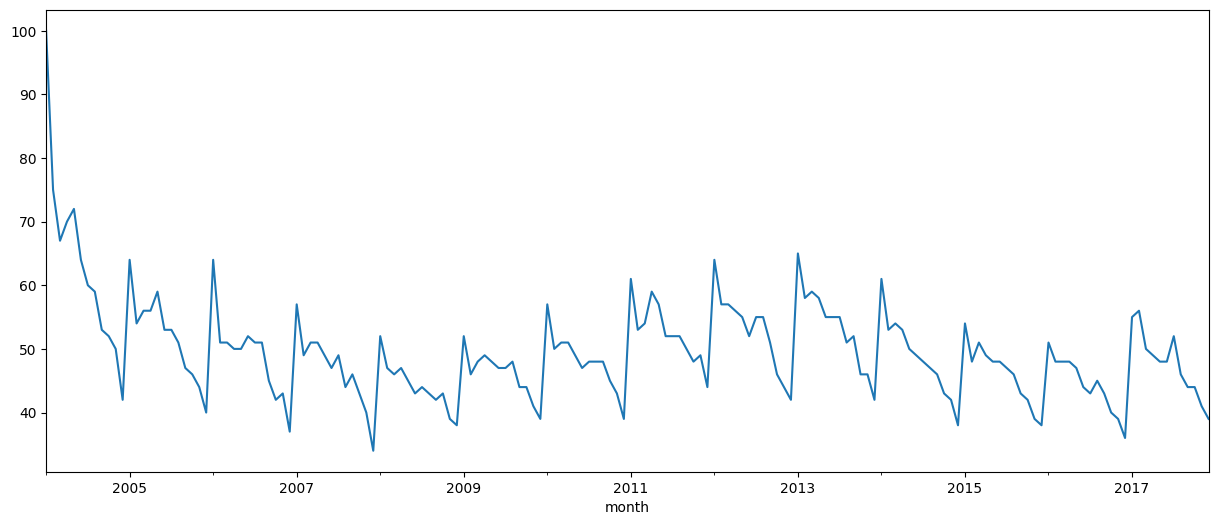

In [157]:
df.diet.plot(figsize=(15,6))

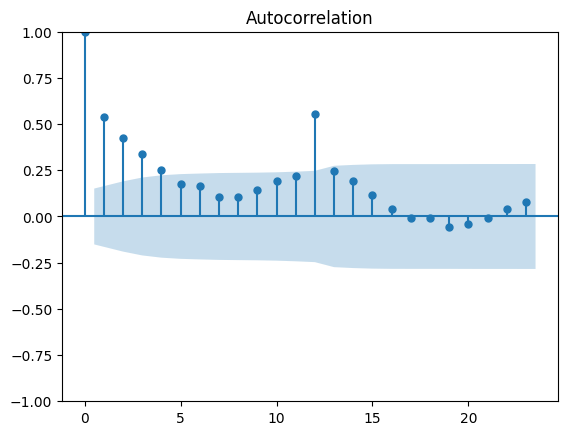

In [158]:
plot_acf(df.diet)
plt.show()

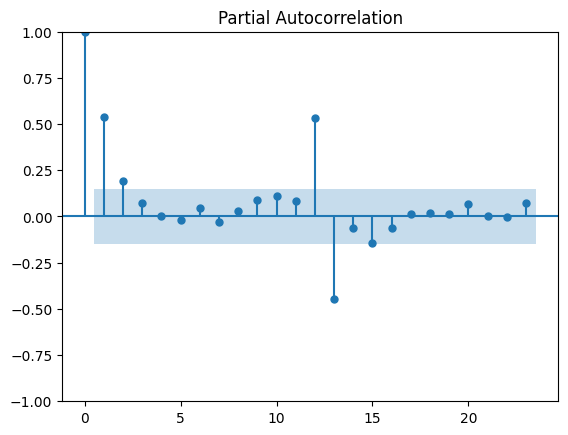

In [159]:
plot_pacf(df.diet)
plt.show()

## Diminuição de Ruido


 Será necessário usar taticas para ver está serie temporal de outra forma, uma forma de diminiuir o ruido, para isso usaremos o sistema de medias moveis.
 
   
 em medias moveis as estatísticas são calculadas deslizando uma janela de determinado tamanho sobre a série temporal original e
agregando os dados para cada janela.  


Isso também é conhecido como convolução ao longo do tempo índice.  
Os dois parâmetros importantes da operação convolutiva são o tamanho da janela e comprimento da passada.   
O primeiro define o número de unidades de tempo tomadas como entrada para o agregado função enquanto o último define a lacuna ao longo do índice de tempo entre cada cálculo.    

Por exemplo, suponha que um tamanho de janela k e uma passada de comprimento l sejam usados ​​para calcular a função f
ao longo de uma série temporal    


**x1,x2, ... ,xn**                          

contendo N observações.     
Neste cenário, a estatística móvel é obtido como    


**f(x1,x2, ... ,xt), f(x1+l,x2+l, ... ,xt+l)**  


 e assim por diante.     
Observe que toda vez que a função é calculado deslocando a janela de tempo para a direita em l unidades de tempo.   
A média móvel é um caso especial da função f e requer simplesmente calcular a média do
observações na janela de tempo.

* Desta forma é possivel melhorar a visualização da série, assim observamos com detalhes.   
A partir desta melhoria vemos que no perido de 2005 a pesquisa sobre dieta estava em alto mas que houve uma queda na pesquisa ate o ano de 2009 e que a partir de 2009 houve um novo crescimento no interesse sobre dieta.     
Porém, no ano de 2014 houve uma nova queda depois de o numero se manter no anos de 2012 a 2014 e no final da série parece haver um novo crescimento.   

<Axes: xlabel='month'>

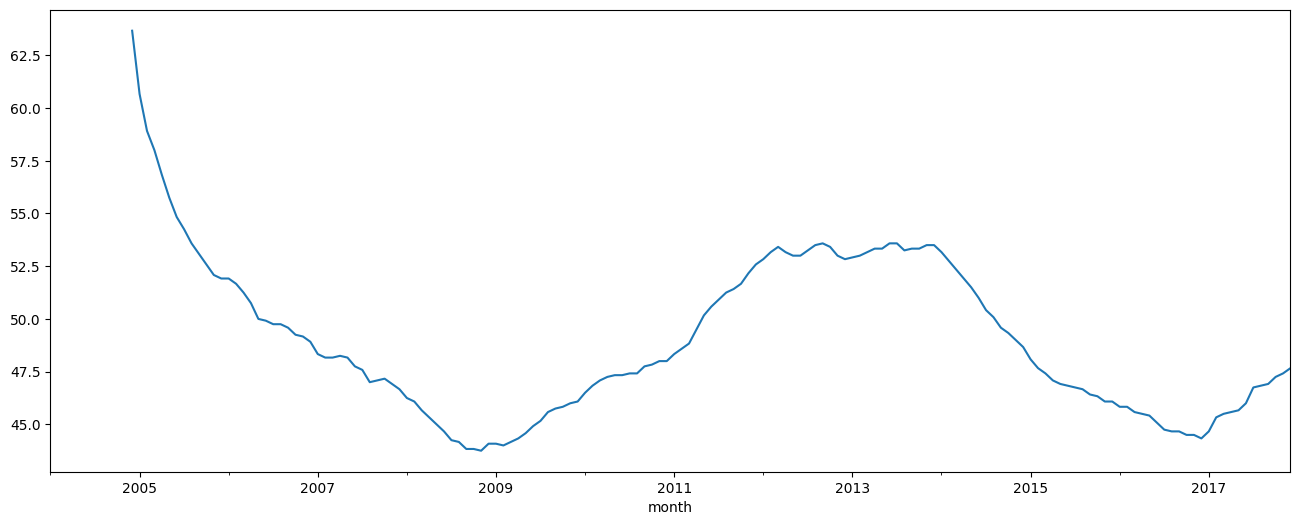

In [160]:
df_mean_diet = df["diet"].rolling(12).mean()
df_mean_diet.plot(figsize=(16,6))

<Axes: xlabel='month'>

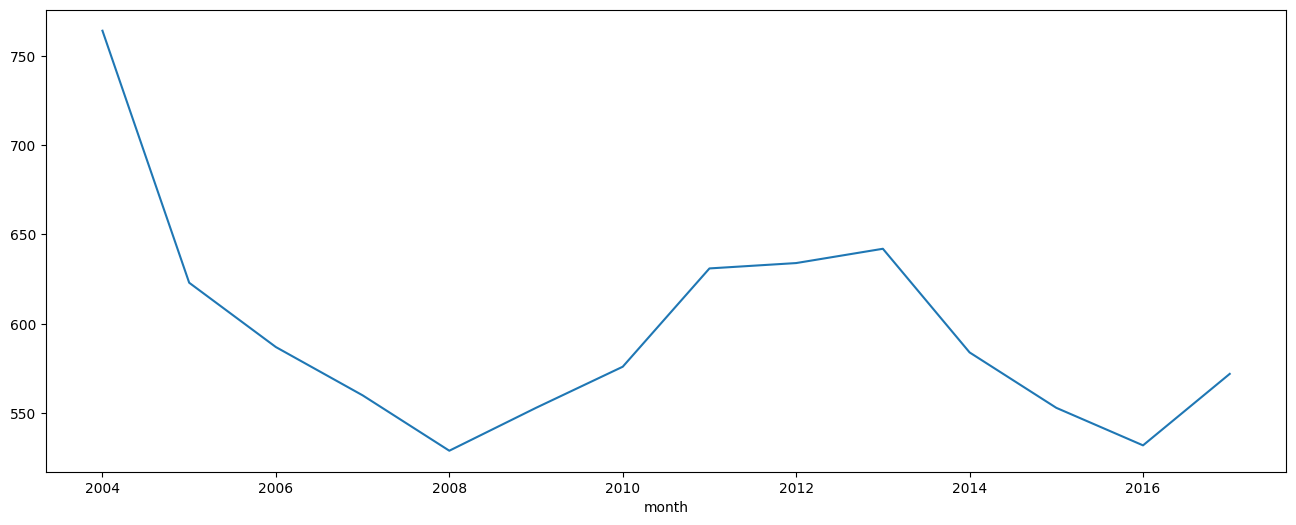

In [161]:
ocorrencias_anuais = df.diet.groupby(df.index.year).sum()
ocorrencias_anuais.plot(figsize=(16,6))

<Axes: xlabel='month'>

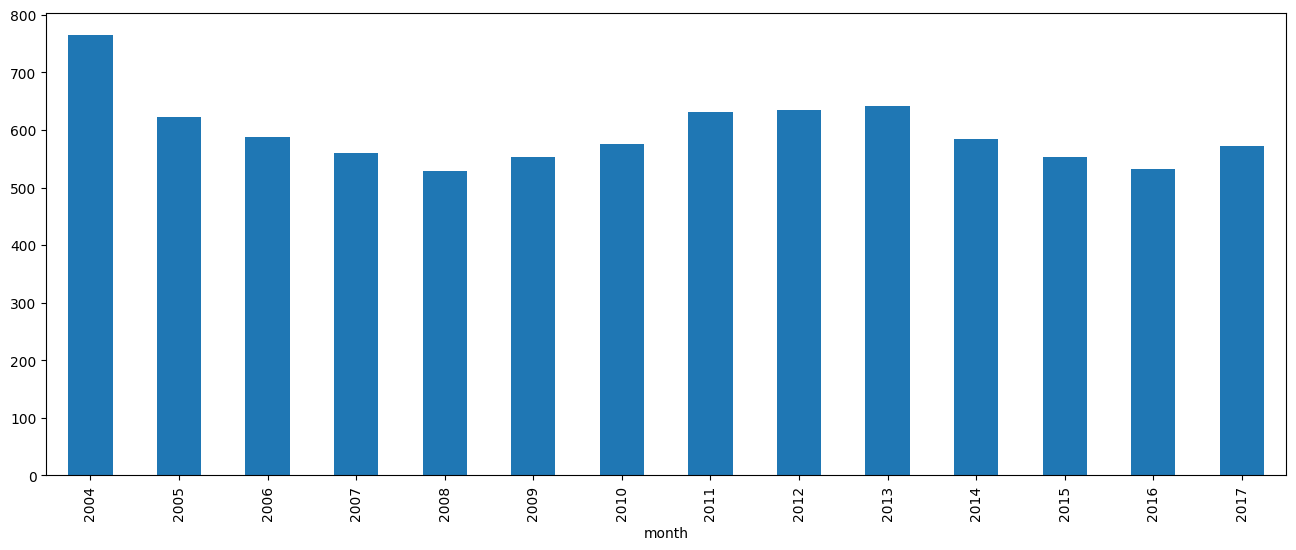

In [162]:
ocorrencias_anuais.plot(kind="bar",figsize=(16,6))

## Sazonalidade

<Axes: xlabel='month'>

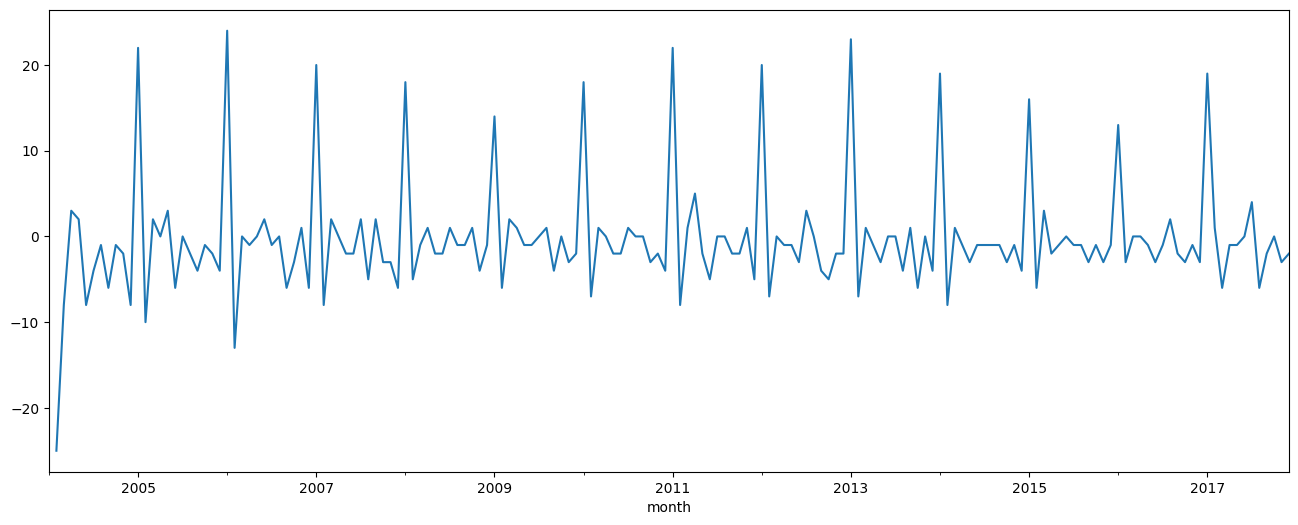

In [163]:
df.diet.diff().plot(figsize=(16,6))

<Axes: xlabel='month'>

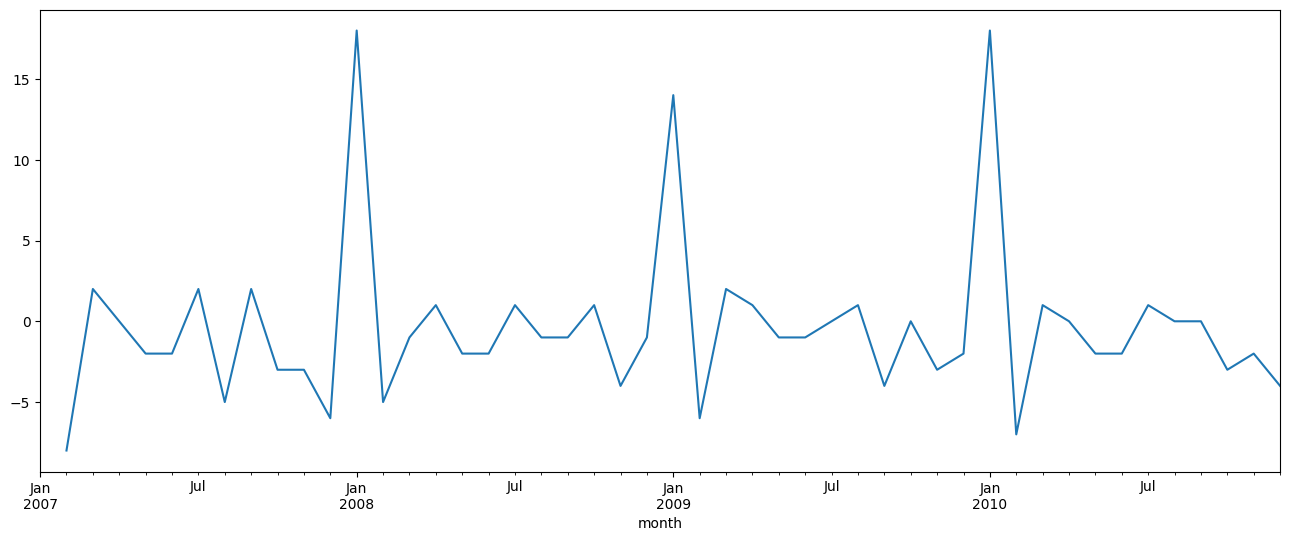

In [164]:
filtro = (df.index.year >=2007) & (df.index.year <= 2010)
df[filtro].diet.diff().plot(figsize=(16,6))

<Axes: xlabel='month'>

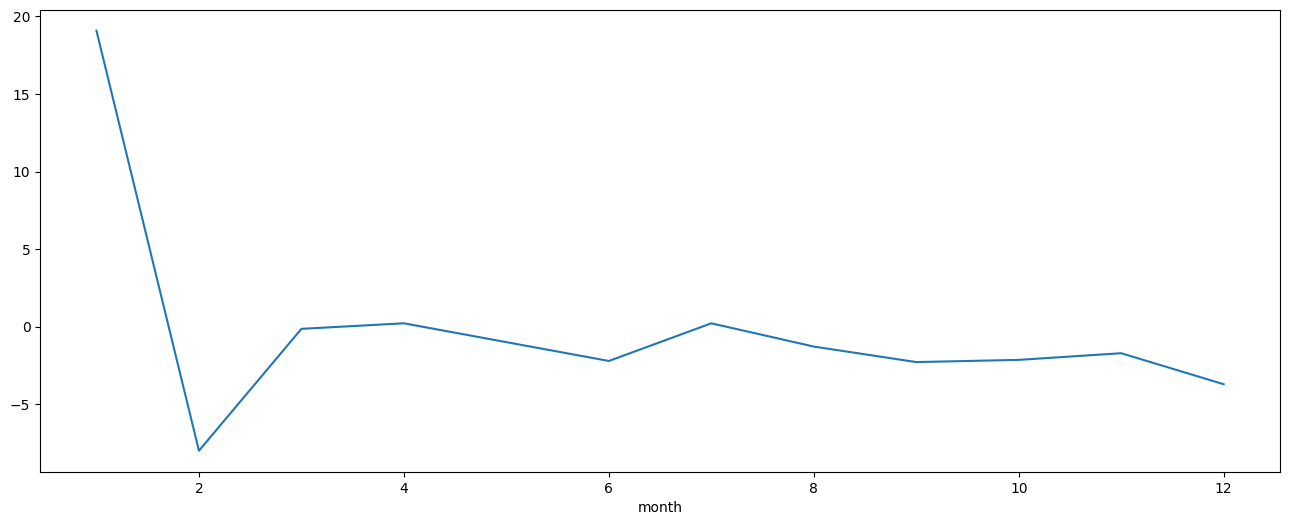

In [165]:
df.diet.diff().groupby(df.index.month).mean().plot(figsize=(16,6))

# Modelagem

In [166]:
n = len(df.diet)
train_size = int(n*2/3)
train_set = df[:train_size]
test_set = df[train_size:]
train_set.index = pd.DatetimeIndex(train_set.index, freq='MS')
test_set.index = pd.DatetimeIndex(test_set.index, freq='MS')


In [167]:
train_set

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,67
2004-04-01,70
2004-05-01,72
...,...
2012-12-01,42
2013-01-01,65
2013-02-01,58


In [168]:
test_set

,diet
month,
2013-05-01,55
2013-06-01,55
2013-07-01,55
2013-08-01,51
2013-09-01,52
2013-10-01,46
2013-11-01,46
2013-12-01,42
2014-01-01,61


In [169]:
df["naive"] =df.diet.shift(1)
erro_quad_medio = (df.diet - df.naive)** 2
erro_quad_medio.mean()

43.778443113772454

## AutoReg

In [170]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_set, lags=2)
result = model.fit()

In [171]:
print("mean square erro model AutoReg:",((result.resid)**2).mean())
display(result.resid.describe())

mean square erro model AutoReg: 32.05274121217725


count    1.100000e+02
mean     5.335530e-14
std      5.687425e+00
min     -1.053879e+01
25%     -3.163176e+00
50%     -8.092553e-01
75%      1.209339e+00
max      1.948553e+01
dtype: float64

In [172]:
predict = result.params[0] + result.params[1]*test_set.shift(1) + result.params[2]*test_set.shift(2) 

C:\Users\kaio\AppData\Local\Temp\ipykernel_19848\17332201.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict = result.params[0] + result.params[1]*test_set.shift(1) + result.params[2]*test_set.shift(2)


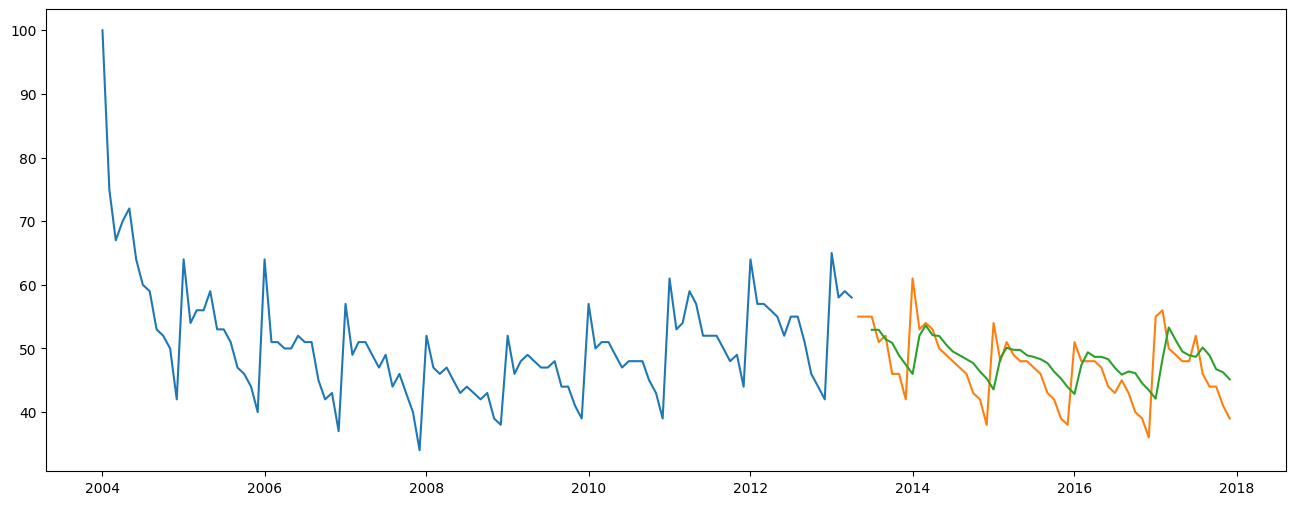

In [173]:
plt.figure(figsize=(16,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(predict)

## ARMA

In [174]:
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(train_set, order=(2,0,2)).fit()
model_arma.params


c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


const     55.640959
ar.L1     -0.054139
ar.L2      0.944568
ma.L1      0.616622
ma.L2     -0.367566
sigma2    39.264682
dtype: float64

In [175]:
model_arma_test = ARIMA(test_set, order=(2,0,2)).fit(model_arma.params)
((model_arma.resid)**2).mean()

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


53.7339518901311

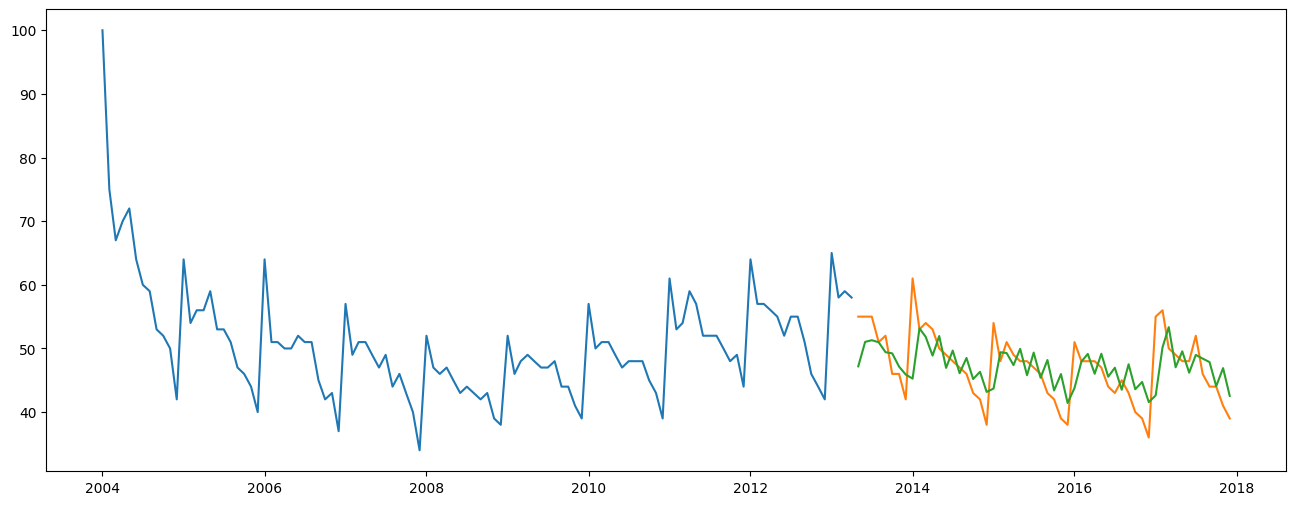

In [176]:
plt.figure(figsize=(16,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(model_arma_test.predict())

## ARIMA

<Axes: xlabel='month'>

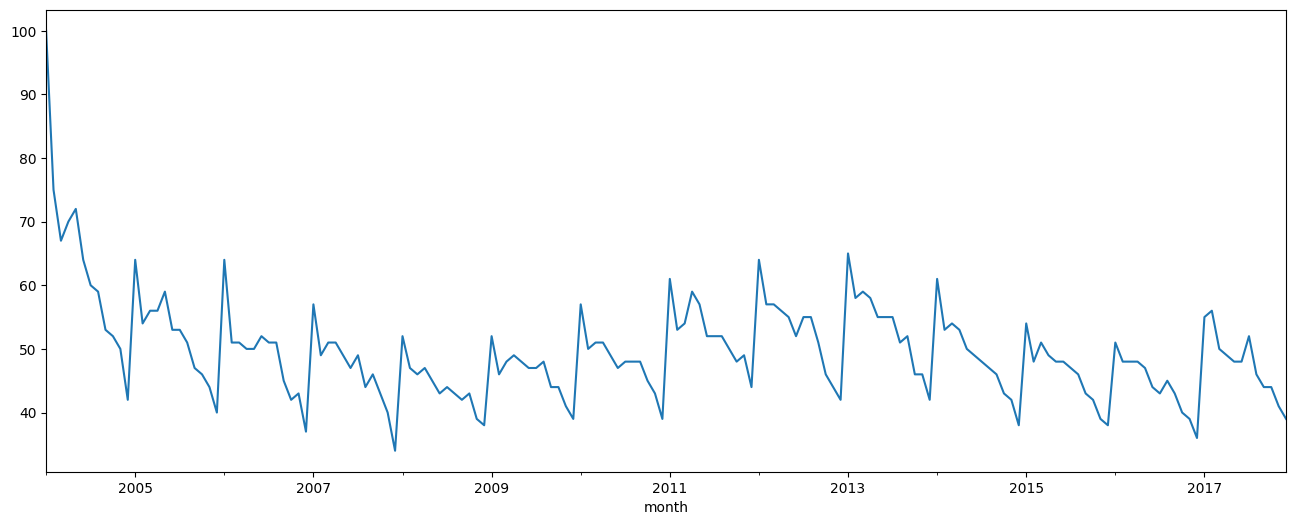

In [177]:
df.diet.plot(figsize=(16,6))

In [178]:
model_arima = ARIMA(train_set,order=(2,1,2))
arima = model_arima.fit()

model_arima_test = ARIMA(test_set,order=(2,1,2)).fit(arima.params)
print("erro quadratico medio:",((arima.resid)**2).mean())

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


erro quadratico medio: 133.08252178492418


c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


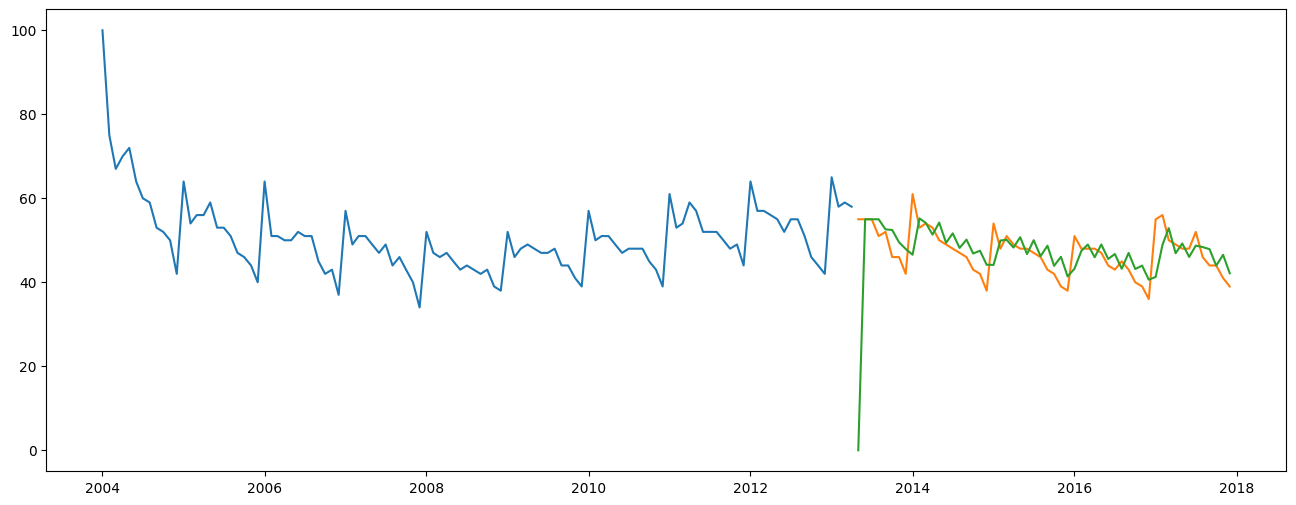

In [179]:
plt.figure(figsize=(16,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(model_arima_test.predict(typ='levels'))

## SARIMAX

In [180]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model  = SARIMAX(train_set, order=(2,1,2), seasonal_order= (3,1,2,12)).fit()
((sarima_model.resid)**2).mean()


sarima_model_teste  = SARIMAX(test_set, order=(2,1,2), seasonal_order= (3,1,2,12)).fit(sarima_model.params)

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


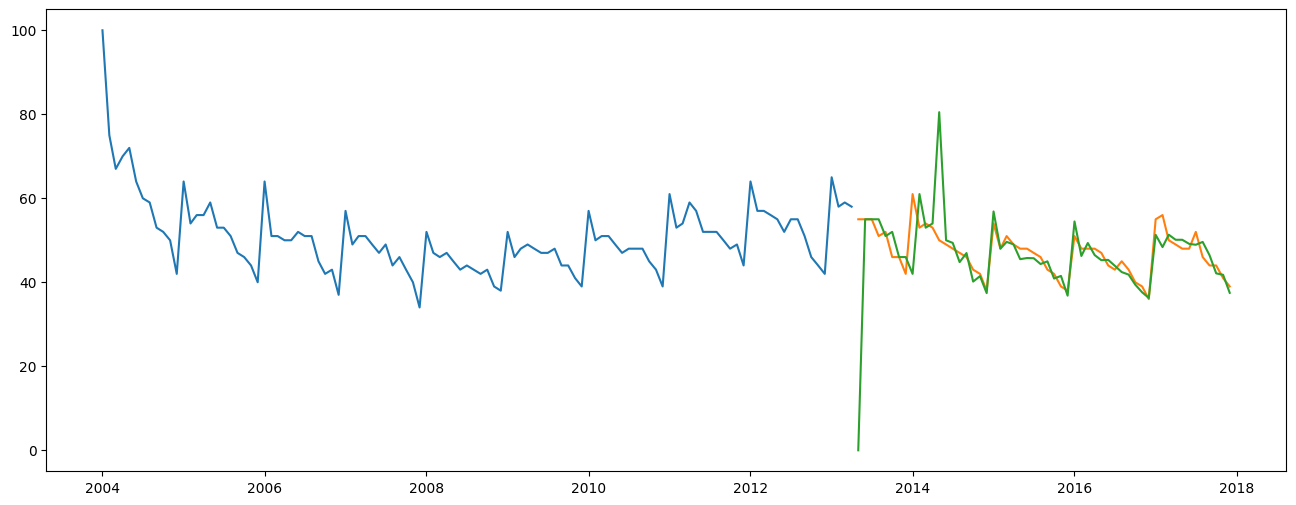

In [181]:
plt.figure(figsize=(16,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(sarima_model_teste.predict(typ='levels'))

## Decision Tree

In [182]:
p = 5 
for i in range(p):
    train_set[f'x_{i+1}'] = train_set.diet.shift(i+1)
train_set.dropna(axis=0, inplace=True)


p = 5 
for i in range(p):
    test_set[f'x_{i+1}'] = test_set.diet.shift(i+1)
test_set.dropna(axis=0, inplace=True)


C:\Users\kaio\AppData\Local\Temp\ipykernel_19848\688282750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'x_{i+1}'] = train_set.diet.shift(i+1)
C:\Users\kaio\AppData\Local\Temp\ipykernel_19848\688282750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'x_{i+1}'] = train_set.diet.shift(i+1)
C:\Users\kaio\AppData\Local\Temp\ipykernel_19848\688282750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [183]:
X_train = train_set.drop("diet",axis=1)
y_train = train_set.diet


X_test = test_set.drop("diet",axis=1)
y_test = test_set.diet

In [184]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Certifique-se de que X_train, X_test, y_train e y_test estão definidos corretamente
# Aqui eu assumo que você já os tem definidos corretamente em algum lugar do seu código

# Inicializando o modelo
reg = DecisionTreeRegressor()

# Treinando o modelo
reg.fit(X_train, y_train)  # Supondo que y_train é seu conjunto de treinamento para os alvos

# Fazendo previsões
predicao = reg.predict(X_test)  # Corrigido para 'X_test'

# Calculando a diferença entre os valores reais e previstos
diferenca = ((y_test - predicao )**2).mean() # Corrigido para 'y_test'

# Se você precisar imprimir ou fazer algo com a diferença
print(diferenca)


48.07843137254902


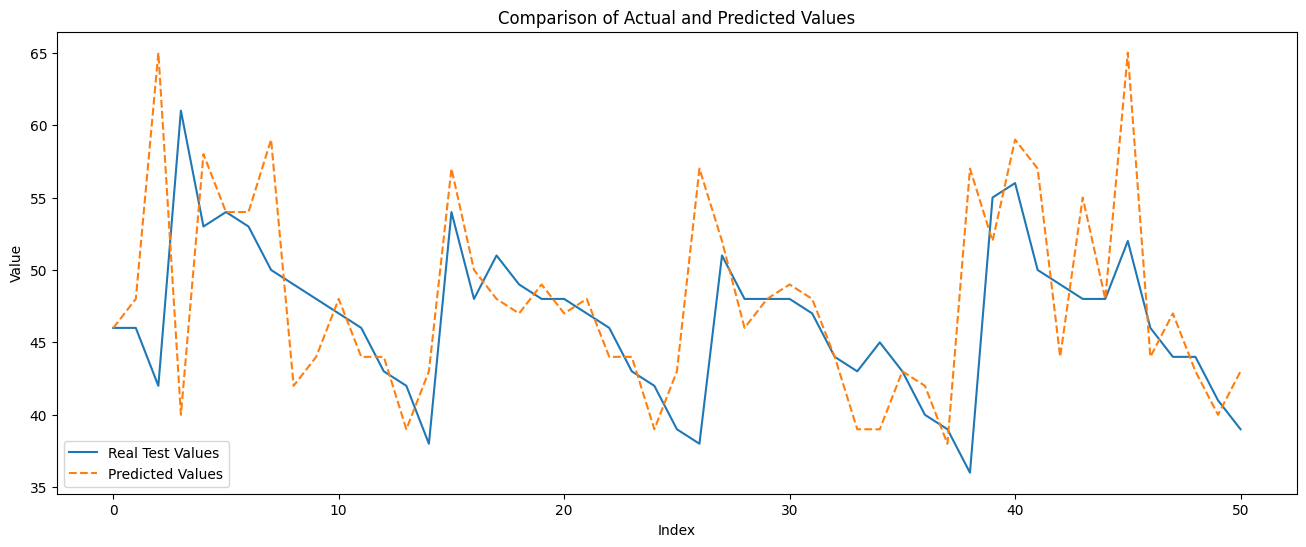

In [185]:

# Fazendo previsões
predicao = reg.predict(X_test)

# Plotando os resultados
plt.figure(figsize=(16, 6))
plt.plot(y_test.reset_index(drop=True), label='Real Test Values')
plt.plot(predicao, label='Predicted Values', linestyle='--')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
